Word Embedding chapter 2.1 assignment


In [47]:
with open('corpus/the-verdict.txt', 'r', encoding='utf-8') as file:
    raw_text = file.read()
print("Total number of characters in the file:", len(raw_text))
print(raw_text[:100])









Total number of characters in the file: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no g


In [48]:
import re 
text='hello, world! a;lkjf i know htat if happens'
result=re.split(r'(\s)',text)
print(result)









['hello,', ' ', 'world!', ' ', 'a;lkjf', ' ', 'i', ' ', 'know', ' ', 'htat', ' ', 'if', ' ', 'happens']


In [49]:
import re 
text='hello, world! a;lkjf i know htat if happens'
result2=re.split(r'([\s,;])',text)
print(result2)









['hello', ',', '', ' ', 'world!', ' ', 'a', ';', 'lkjf', ' ', 'i', ' ', 'know', ' ', 'htat', ' ', 'if', ' ', 'happens']


In [50]:
import re

# Read the text from the file
with open('corpus/the-verdict.txt', 'r', encoding='utf-8') as f:
    verdict_text = f.read()

# Use regex to split so that every word, whitespace, and special character is a separate token
# This will match words, whitespace, or any single non-whitespace, non-word character
tokens = re.findall(r'\w+|\s+|[^\w\s]', verdict_text)

# Print the first 50 tokens as a check
print(tokens[:500])



['I', ' ', 'HAD', ' ', 'always', ' ', 'thought', ' ', 'Jack', ' ', 'Gisburn', ' ', 'rather', ' ', 'a', ' ', 'cheap', ' ', 'genius', '-', '-', 'though', ' ', 'a', ' ', 'good', ' ', 'fellow', ' ', 'enough', '-', '-', 'so', ' ', 'it', ' ', 'was', ' ', 'no', ' ', 'great', ' ', 'surprise', ' ', 'to', ' ', 'me', ' ', 'to', ' ', 'hear', ' ', 'that', ',', ' ', 'in', ' ', 'the', ' ', 'height', ' ', 'of', ' ', 'his', ' ', 'glory', ',', ' ', 'he', ' ', 'had', ' ', 'dropped', ' ', 'his', ' ', 'painting', ',', ' ', 'married', ' ', 'a', ' ', 'rich', ' ', 'widow', ',', ' ', 'and', ' ', 'established', ' ', 'himself', ' ', 'in', ' ', 'a', ' ', 'villa', ' ', 'on', ' ', 'the', ' ', 'Riviera', '.', ' ', '(', 'Though', ' ', 'I', ' ', 'rather', ' ', 'thought', ' ', 'it', ' ', 'would', ' ', 'have', ' ', 'been', ' ', 'Rome', ' ', 'or', ' ', 'Florence', '.', ')', '\n\n', '"', 'The', ' ', 'height', ' ', 'of', ' ', 'his', ' ', 'glory', '"', '-', '-', 'that', ' ', 'was', ' ', 'what', ' ', 'the', ' ', 'women', ' '

In [51]:
tokens_no_whitespace = [token for token in tokens if not token.isspace()]
print(tokens_no_whitespace[:500])


['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '-', '-', 'though', 'a', 'good', 'fellow', 'enough', '-', '-', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in', 'the', 'height', 'of', 'his', 'glory', ',', 'he', 'had', 'dropped', 'his', 'painting', ',', 'married', 'a', 'rich', 'widow', ',', 'and', 'established', 'himself', 'in', 'a', 'villa', 'on', 'the', 'Riviera', '.', '(', 'Though', 'I', 'rather', 'thought', 'it', 'would', 'have', 'been', 'Rome', 'or', 'Florence', '.', ')', '"', 'The', 'height', 'of', 'his', 'glory', '"', '-', '-', 'that', 'was', 'what', 'the', 'women', 'called', 'it', '.', 'I', 'can', 'hear', 'Mrs', '.', 'Gideon', 'Thwing', '-', '-', 'his', 'last', 'Chicago', 'sitter', '-', '-', 'deploring', 'his', 'unaccountable', 'abdication', '.', '"', 'Of', 'course', 'it', "'", 's', 'going', 'to', 'send', 'the', 'value', 'of', 'my', 'picture', "'", 'way', 'up', ';', 'but', 'I', 'don', "'", 't', 'thin

In [52]:
len(tokens_no_whitespace)

4827

In [53]:
all_words=sorted(set(tokens_no_whitespace))
vocab_size=len(all_words)
print(f"Vocabulary size: {vocab_size}")

Vocabulary size: 1148


In [54]:
word_to_index = {word: idx for idx, word in enumerate(all_words)}
print(list(word_to_index.items())[:50])


[('!', 0), ('"', 1), ("'", 2), ('(', 3), (')', 4), (',', 5), ('-', 6), ('.', 7), (':', 8), (';', 9), ('?', 10), ('A', 11), ('Ah', 12), ('Among', 13), ('And', 14), ('Are', 15), ('Arrt', 16), ('As', 17), ('At', 18), ('Be', 19), ('Begin', 20), ('Burlington', 21), ('But', 22), ('By', 23), ('Carlo', 24), ('Chicago', 25), ('Claude', 26), ('Come', 27), ('Croft', 28), ('Destroyed', 29), ('Devonshire', 30), ('Don', 31), ('Dubarry_', 32), ('Emperors', 33), ('Florence', 34), ('For', 35), ('Gallery', 36), ('Gideon', 37), ('Gisburn', 38), ('Gisburns', 39), ('Grafton', 40), ('Greek', 41), ('Grindle', 42), ('Grindles', 43), ('HAD', 44), ('Had', 45), ('Hang', 46), ('Has', 47), ('He', 48), ('Her', 49)]


In [55]:
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_idx = {word: idx for idx, word in enumerate(vocab)}
        self.idx_to_str = {idx: word for word, idx in self.str_to_idx.items()}
        self.unk_token = "<unk>" if "<unk>" in self.str_to_idx else None

    def encode(self, text):
        preprocessed_text = re.sub(r'[^\w\s]', '', text)
        words = preprocessed_text.split()
        if self.unk_token is not None:
            return [self.str_to_idx[word] if word in self.str_to_idx else self.str_to_idx[self.unk_token] for word in words]
        else:
            return [self.str_to_idx[word] for word in words]

    def decode(self, ids):
        text = ' '.join([self.idx_to_str[idx] if idx in self.idx_to_str else (self.unk_token if self.unk_token is not None else '') for idx in ids])
        text = re.sub(r'\s+', ' ', text)
        return text.strip()


In [56]:
# Let's test the SimpleTokenizerV1 class with a sample text
# Ensure the sample text only contains words from the vocab
sample_text = "I had always thought Jack Gisburn rather a cheap good fellow enough so it was no great surprise to me to hear that in the height of his glory he had dropped his painting married a rich widow and established himself in a villa on the Riviera"
tokenizer = SimpleTokenizerV1(all_words)

# Encode the sample text
encoded = tokenizer.encode(sample_text)
print("Encoded:", encoded)

# Decode the encoded ids
decoded = tokenizer.decode(encoded)
print("Decoded:", decoded)


Encoded: [53, 530, 163, 1021, 57, 38, 835, 129, 271, 518, 452, 410, 925, 599, 1096, 723, 524, 979, 1034, 676, 1034, 548, 1005, 582, 1006, 551, 736, 562, 514, 546, 530, 388, 562, 762, 674, 129, 858, 1120, 170, 415, 560, 582, 129, 1085, 741, 1006, 84]
Decoded: I had always thought Jack Gisburn rather a cheap good fellow enough so it was no great surprise to me to hear that in the height of his glory he had dropped his painting married a rich widow and established himself in a villa on the Riviera


In [57]:
# Add special tokens to the vocabulary and update the mappings
special_tokens = ['<eot>', '<unk>']
for token in special_tokens:
    if token not in all_words:
        all_words.append(token)

# Update vocab_size
vocab_size = len(all_words)
print(f"Vocabulary size (with special tokens): {vocab_size}")



# Show the last few entries to confirm special tokens are present
print("Last 5 vocab entries:", list(word_to_index.items())[-5:])


Vocabulary size (with special tokens): 1150
Last 5 vocab entries: [('yet', 1143), ('you', 1144), ('younger', 1145), ('your', 1146), ('yourself', 1147)]


In [58]:
text1='hello, world! a;lkjf i know htat if happens'
text2="In the height of his glory, he had dropped his painting, married a rich widow, and established himself in a villa on the Riviera."

text="<eot>".join([text1,text2])
print(text)











hello, world! a;lkjf i know htat if happens<eot>In the height of his glory, he had dropped his painting, married a rich widow, and established himself in a villa on the Riviera.


In [59]:
tokenizer=SimpleTokenizerV1(all_words)

print(tokenizer.encode(text))










[1149, 1149, 1149, 1149, 609, 1149, 580, 1149, 1006, 551, 736, 562, 514, 546, 530, 388, 562, 762, 674, 129, 858, 1120, 170, 415, 560, 582, 129, 1085, 741, 1006, 84]


In [60]:
import tiktoken

# Common choices:
# - "cl100k_base": used by GPT-4/3.5 Turbo
# - "gpt2": used by GPT‑2/3 legacy
enc = tiktoken.get_encoding("cl100k_base")

text = "Hello, world! The Verdict by Edith Wharton."
ids = enc.encode(text)                 # list of token ids
print(ids, len(ids))
print(enc.decode(ids))                 # back to string

[9906, 11, 1917, 0, 578, 6383, 8644, 555, 3279, 411, 1254, 80596, 13] 13
Hello, world! The Verdict by Edith Wharton.


In [61]:
decoded_text = enc.decode(ids)
print(decoded_text)


Hello, world! The Verdict by Edith Wharton.


In [62]:
with open('corpus/the-verdict.txt', 'r') as file:
    raw_text = file.read()


enc_text=enc.encode(raw_text)
print(len(enc_text))




4943


In [63]:
sample_100 = enc_text[:100]
print(sample_100)


[40, 473, 1846, 2744, 3463, 7762, 480, 285, 22464, 4856, 264, 12136, 35201, 313, 4636, 264, 1695, 12637, 3403, 313, 708, 433, 574, 912, 2294, 13051, 311, 757, 311, 6865, 430, 11, 304, 279, 2673, 315, 813, 27025, 11, 568, 1047, 12504, 813, 19354, 11, 12502, 264, 9257, 57896, 11, 323, 9749, 5678, 304, 264, 47625, 389, 279, 51768, 26919, 13, 320, 27831, 358, 4856, 3463, 433, 1053, 617, 1027, 22463, 477, 48606, 9456, 10227, 2673, 315, 813, 27025, 75857, 9210, 574, 1148, 279, 3278, 2663, 433, 13, 358, 649, 6865, 18083, 13, 480, 100242, 666, 24510, 313, 26301, 1566]


In [64]:
context_size=4

x=enc_text[:context_size]


In [65]:
import torch
import torch
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        token_ids = tokenizer.encode(txt)  #1

        for i in range(0, len(token_ids) - max_length, stride):  #2
            input_chunk = token_ids[i : i + max_length]
            target_chunk = token_ids[i + 1 : i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):  #3
        return len(self.input_ids)

    def __getitem__(self, idx):  #4
        return self.input_ids[idx], self.target_ids[idx]
        

In [66]:
dataset=GPTDatasetV1(txt=raw_text,tokenizer=enc,max_length=4,stride=10)

In [67]:
len(dataset)




494

In [68]:
import torch
import torch.nn as nn

# Define a simple embedding layer
vocab_size =50257 # assuming enc_text contains all token ids
embedding_dim = 256  # you can choose any dimension

embedding_layer = nn.Embedding(vocab_size, embedding_dim)

# Example: get embeddings for the first 10 tokens
input_tokens = torch.tensor(enc_text[:10])
embeddings = embedding_layer(input_tokens)
print(embeddings)


tensor([[-0.8344, -1.0225, -0.8531,  ...,  0.4846,  1.9862,  1.2526],
        [ 0.2087, -0.6060,  0.8480,  ...,  1.0472,  0.9735, -0.7083],
        [-0.0217, -0.6680,  0.1606,  ..., -0.4493,  0.2942,  0.4851],
        ...,
        [ 0.4886,  2.1469, -0.8107,  ..., -1.6966,  0.4089, -2.8211],
        [ 2.5293,  0.4575,  2.2196,  ..., -1.7357,  1.4130,  0.2255],
        [-0.9635, -1.1634,  0.5515,  ..., -1.3202, -0.2547, -1.2055]],
       grad_fn=<EmbeddingBackward0>)


In [69]:
def create_dataloader_v1(txt, batch_size=4, max_length=256, stride=128, shuffle=True, drop_last=True, num_workers=0):
    tokenizer = tiktoken.get_encoding("gpt2")
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )
    return dataloader

max_length = 4
dataloader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=max_length,
    stride=max_length, shuffle=False
)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Token IDs:\n", inputs)
print("\nInputs shape:\n", inputs.shape)


Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Inputs shape:
 torch.Size([8, 4])


In [70]:
token_embeddings=embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


absolute embeddings layer

In [71]:
context_length=max_length
pos_embedding_layer=torch.nn.Embedding(context_length,embedding_dim)
positional_embeddings=pos_embedding_layer(torch.arange(context_length))
print(positional_embeddings)

tensor([[-0.3946,  0.4274, -2.3213,  ..., -0.1984, -1.4348,  0.0411],
        [ 0.5909,  0.8927, -0.6213,  ...,  1.7454,  0.3711,  0.7022],
        [-0.5403,  1.4951,  1.4297,  ...,  0.5007,  0.7117,  0.6698],
        [ 0.1909,  1.1373, -0.5982,  ...,  0.0581, -1.8555, -0.6455]],
       grad_fn=<EmbeddingBackward0>)


In [72]:
input_embeddings=positional_embeddings+token_embeddings

print(input_embeddings.shape)

torch.Size([8, 4, 256])


In [73]:
query = torch.empty(input_embeddings.shape)
query.shape
attention_table_col=input_embeddings.shape[1]
attention_table_row=input_embeddings.shape[1]
attention_scores = torch.empty(8,attention_table_row,attention_table_col)
attention_weights = torch.empty(8,attention_table_row,attention_table_col)


for i,element in enumerate(input_embeddings):
    attention_scores[i]=element@element.T
    attention_weights[i]=torch.softmax(attention_scores[i],dim=1)
    # print(attention_weights)
    print(attention_weights[i].sum(dim=1))
    print(attention_weights[i].shape)
    # print(attention_weights.shape)
    query[i]=attention_weights[i]@element
    




tensor([1., 1., 1., 1.], grad_fn=<SumBackward1>)
torch.Size([4, 4])
tensor([1., 1., 1., 1.], grad_fn=<SumBackward1>)
torch.Size([4, 4])
tensor([1., 1., 1., 1.], grad_fn=<SumBackward1>)
torch.Size([4, 4])
tensor([1., 1., 1., 1.], grad_fn=<SumBackward1>)
torch.Size([4, 4])
tensor([1., 1., 1., 1.], grad_fn=<SumBackward1>)
torch.Size([4, 4])
tensor([1., 1., 1., 1.], grad_fn=<SumBackward1>)
torch.Size([4, 4])
tensor([1., 1., 1., 1.], grad_fn=<SumBackward1>)
torch.Size([4, 4])
tensor([1., 1., 1., 1.], grad_fn=<SumBackward1>)
torch.Size([4, 4])


In [74]:
torch.manual_seed(72)
d_in=256
d_out=72
W_query=torch.nn.Parameter(torch.rand(d_in,d_out),requires_grad=False)
W_key=torch.nn.Parameter(torch.rand(d_in,d_out),requires_grad=False)
W_value=torch.nn.Parameter(torch.rand(d_in,d_out),requires_grad=False)




In [75]:
input_vector = input_embeddings[0][0]
print(input_vector.reshape(1, -1))

tensor([[-1.2290e+00, -5.9509e-01, -3.1744e+00, -3.0316e+00, -6.3213e-01,
          5.8722e-01,  1.3980e+00,  7.9777e-01, -8.8286e-02, -1.5712e+00,
          7.2113e-01,  2.9131e-01, -7.5297e-01,  2.2121e+00,  2.3546e+00,
         -2.6200e+00, -6.5233e-01, -7.1504e-01,  1.2777e+00,  1.0399e+00,
         -1.0511e+00,  2.5253e+00,  7.4948e-01,  2.4135e-01, -9.1394e-02,
          1.1588e+00,  2.7922e-01, -3.9609e-01, -2.1079e+00,  1.4400e+00,
         -3.5792e-01,  7.9199e-01, -1.9630e+00, -9.8013e-01,  1.0177e+00,
          8.6998e-01, -3.1544e-01, -5.9904e-01,  3.7691e-01,  1.6524e+00,
         -1.5082e+00,  3.7887e-01,  3.0447e-01, -3.2149e-02,  7.6003e-01,
          1.1566e+00,  6.1509e-01,  9.0333e-02,  1.8972e+00,  3.2017e+00,
          3.4993e-02,  3.4410e-01, -4.0470e-01,  3.2788e-01, -1.8356e+00,
          1.8804e-01, -1.2250e-01,  1.0389e+00,  1.2796e+00,  2.7727e+00,
          1.0089e+00, -1.6401e+00, -1.7382e+00, -1.6241e-01, -1.6881e+00,
         -1.1662e+00, -8.1370e-01,  5.

In [76]:
input_to_query=input_vector@W_query
input_to_key=input_vector@W_key
input_to_value=input_vector@W_value


In [77]:
print(input_to_query.shape)

torch.Size([72])


In [78]:
inputs_to_querys=input_embeddings@W_query
inputs_to_keys=input_embeddings@W_key
inputs_to_values=input_embeddings@W_value

In [79]:
print(inputs_to_querys.shape)
print(inputs_to_keys.shape)

torch.Size([8, 4, 72])
torch.Size([8, 4, 72])


In [80]:
query_key_attention_scores=inputs_to_querys@inputs_to_keys.transpose(1,2)

In [81]:

d_k=inputs_to_keys.shape[-1]
print(d_k)
query_key_attention_scores_normalized=torch.softmax(query_key_attention_scores/d_k**0.5,dim=-1)

72


In [82]:
context_vector=query_key_attention_scores_normalized@inputs_to_values

In [83]:
print(context_vector.shape)

torch.Size([8, 4, 72])


In [84]:
import torch.nn as nn
class SelfAttention_v1(nn.Module):
    def __init__(self,d_in,d_out):
        super.__init__()
        self.W_query=torch.nn.Parameter(torch.rand(d_in,d_out))
        self.W_key=torch.nn.Parameter(torch.rand(d_in,d_out))
        self.W_value=torch.nn.Parameter(torch.rand(d_in,d_out))
        
        
    def forward(self,x):
        queries=x@self.W_query
        keys=x@self.W_key
        values=x@self.W_values
        
        attention_scores=queries@keys.T
        attention_weights=torch.softmax(attention_scores/keys.shape[-1]**0.5,dim=-1)
        context_vectors=attention_weights@values
        return context_vectors
        
        



In [85]:

#  Just used nn.Linear for better activation. 



class SelfAttention_v2(nn.Module):
    def __init__(self,d_in,d_out,qkv_bias=False):
        super.__init__()
        self.W_query=nn.Linear(d_in,d_out,bias=qkv_bias)
        self.W_key=nn.Linear(d_in,d_out,bias=qkv_bias)
        self.W_value=nn.Linear(d_in,d_out,bias=qkv_bias)
    def forward(self,X):
        queries=x@self.W_query
        keys=x@self.W_key
        values=x@self.W_values
        
        attention_scores=queries@keys.T
        attention_weight=torch.softmax(attention_scores/keys.shape[-1]**0.5,dim=-1)
        context_vectors=attention_weight@values
        return context_vectors
        

In [86]:
class CausalAttention(nn.Module):
    def __init__(self,d_in,d_out,qkv_bias=False):
        super.__init__()
        self.W_query=nn.Linear(d_in,d_out,bias=qkv_bias)
        self.W_key=nn.Linear(d_in,d_out,bias=qkv_bias)
        self.W_value=nn.Linear(d_in,d_out,bias=qkv_bias)
    
    def forward(self,x):
        queries=x@self.W_query
        keys=x@self.W_key
        values=x@self.W_value
        
        attention_scores=queries@keys.T
        mask=torch.ones(attention_scores.shape[0],attention_scores.shape[1])
        mask=torch.triu(mask)
        attention_scores[mask==1]=torch.tensor(-float('inf'))
        attention_weight=torch.softmax(attention_scores/keys.shape[-1]**0.5,dim=-1)
        # drop out here
        # The 'train' parameter specifies whether dropout should behave in training mode (drop values) or evaluation mode (no dropout).
        # In PyTorch, when train=True, dropout is applied; when train=False, dropout is bypassed.
        attention_weight = torch.dropout(attention_weight, p=0.5, train=self.training)
        context_vectors=attention_weight@values
        return context_vectors

In [87]:
class MultiHeadAttentionWrapper(nn.Module):
    def __init__(self,d_in,d_out,context_length,drop_out,num_heads,qkv_bias=False):
        super().__init__()
        self.heads=nn.ModuleList([CausalAttention(d_in,d_out,context_length,drop_out,qkv_bias)for _ in range(num_heads)])
    def forward(self,x):
        return torch.cat([head(x) for head in self.heads],dim=-1)
        

In [106]:
# The code in the image and your code are very similar, but there are a few key differences and some mistakes in your implementation.
# Here is a version that matches the code in the image, with comments on the differences:

class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, drop_out, num_heads, qkv_bias=False):
        super().__init__()
        assert d_out % num_heads == 0, "d_out must be divisible by num_heads"
        self.d_out = d_out  # <-- This is missing in your code, but used in .view() later
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.drop_out = nn.Dropout(drop_out)
        self.out_proj = nn.Linear(d_out, d_out)
        self.register_buffer("mask", torch.triu(torch.ones(context_length, context_length), diagonal=1))

    def forward(self, x):
        b, num_tokens, d_in = x.shape

        # Linear projections
        keys = self.W_key(x)      # (b, num_tokens, d_out)
        values = self.W_value(x)  # (b, num_tokens, d_out)
        queries = self.W_query(x) # (b, num_tokens, d_out)

        # Reshape for multi-head: (b, num_tokens, num_heads, head_dim)
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)

        # Transpose to (b, num_heads, num_tokens, head_dim)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        # Attention score: (b, num_heads, num_tokens, num_tokens)
        attn_scores = queries @ keys.transpose(2, 3)

        # Apply mask (causal)
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]
        attn_scores = attn_scores.masked_fill(mask_bool, -torch.inf)

        # Scale and softmax
        attn_weights = torch.softmax(attn_scores / (self.head_dim ** 0.5), dim=-1)
        attn_weights = self.drop_out(attn_weights)

        # Weighted sum
        context_vec = (attn_weights @ values).transpose(1, 2)  # (b, num_tokens, num_heads, head_dim)
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec)
        return context_vec


In [96]:
gpt_configuration = {
    "vocab_size": 50257,
    "context_length": 1024,
    "emb_dim": 768,
    "n_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1,
    "qkv_bias": False
}

In [111]:
import torch 
import torch.nn as nn

class Dummy_Scratch_gpt_model(nn.Module):
    def __init__(self,configuration):
        
        super().__init__()
        
        self.token_embedding=nn.Embedding(configuration["vocab_size"],configuration["emb_dim"])
        self.pos_emb=nn.Embedding(configuration["context_length"],configuration["emb_dim"])
        self.drop_emb=nn.Dropout(configuration["drop_rate"])
        
        self.transformer_blocks=nn.Sequential(
            *[Dummy_Transformer_Block(configuration) for _ in range(configuration["n_layers"])]
        )
    
    
        self.final_norm=Dummay_Layer_normalization(configuration["emb_dim"])
        self.out_head=nn.Linear(configuration["emb_dim"],configuration["vocab_size"],bias=False)
        
        
    def forward(self,in_dx):
        batch_size,seq_len=in_dx
        tok_embeddings=self.token_embedding(in_dx)
        pos_embeddings=self.pos_emb(torch.arange(seq_len,device=in_dx.device))
        x=tok_embeddings+pos_embeddings
        x=self.drop_emb(x)
        x=self.transformer_blocks(x)
        x=self.final_norm(x)
        logits=self.out_head(x)
        return logits
        

class GELU(nn.Module):
    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(torch.sqrt(torch.tensor(2.0 / torch.pi, device=x.device)) * (x + 0.044715 * torch.pow(x, 3))))

class Dummy_FeedForward(nn.Module):
    def __init__(self, emb_dim, hidden_dim=None, drop_rate=0.1):
        super().__init__()
        if hidden_dim is None:
            hidden_dim = emb_dim * 4
        self.fc1 = nn.Linear(emb_dim, hidden_dim)
        self.gelu = GELU()
        self.fc2 = nn.Linear(hidden_dim, emb_dim)
        self.dropout = nn.Dropout(drop_rate)
    def forward(self, x):
        x = self.fc1(x)
        x = self.gelu(x)
        x = self.fc2(x)
        x = self.dropout(x)
        return x

class Dummy_SelfAttention(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.mha = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            drop_out=cfg["drop_rate"],
            num_heads=cfg["n_heads"],
            qkv_bias=cfg["qkv_bias"]
        )
    def forward(self, x):
        return self.mha(x)

class Dummy_Transformer_Block(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.ln1 = Dummay_Layer_normalization(cfg["emb_dim"])
        self.attn = Dummy_SelfAttention(cfg)
        self.ln2 = Dummay_Layer_normalization(cfg["emb_dim"])
        self.ff = Dummy_FeedForward(cfg["emb_dim"], drop_rate=cfg["drop_rate"])
    def forward(self, x):
        # Attention block with residual
        x = x + self.attn(self.ln1(x))
        # Feedforward block with residual
        x = x + self.ff(self.ln2(x))
        return x

class Dummay_Layer_normalization(nn.Module):
    def __init__(self, emb_dim, eps=1e-5):
        super().__init__()
        self.eps=eps
        self.scale=nn.Parameter(torch.ones(emb_dim))
        self.shift=nn.Parameter(torch.zeros(emb_dim))
    def forward(self, x):
        mean=x.mean(-1,keepdim=True)
        var=x.var(-1,keepdim=True, unbiased=False)
        norm_x=(x-mean)/torch.sqrt(var+self.eps)
        return self.scale*norm_x+self.shift
    

In [112]:
import tiktoken

tokenizer=tiktoken.get_encoding("gpt2")

batch=[]
str1 = "This is the first string."
str2 = "This is the second string."

batch.append(tokenizer.encode(str1))
batch.append(tokenizer.encode(str2))

In [120]:
torch.manual_seed(22)
model = Dummy_Scratch_gpt_model(gpt_configuration)
total_params = sum(p.numel() for p in model.parameters())
print("Total parameter count:", total_params)


Total parameter count: 163009536


In [107]:

sample_input = torch.randn(2, 5, 768)  # (batch, seq_len, emb_dim)
transformer_block = Dummy_Transformer_Block(gpt_configuration)
output = transformer_block(sample_input)
print("Input shape:", sample_input.shape)
print("Output shape:", output.shape)


Input shape: torch.Size([2, 5, 768])
Output shape: torch.Size([2, 5, 768])


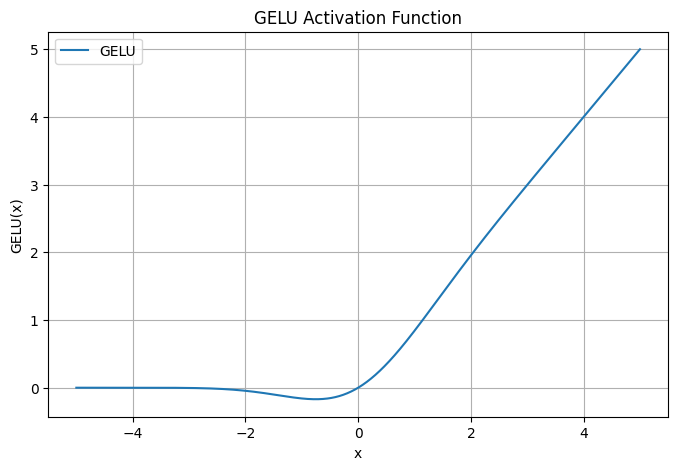

In [92]:
import torch
import matplotlib.pyplot as plt
import numpy as np

gelu = GELU()

x = torch.linspace(-5, 5, 1000)
y = gelu(x)

plt.figure(figsize=(8, 5))
plt.plot(x.numpy(), y.detach().numpy(), label="GELU")
plt.title("GELU Activation Function")
plt.xlabel("x")
plt.ylabel("GELU(x)")
plt.grid(True)
plt.legend()
plt.show()
